![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Redes Neuronales

En este taller podrán poner en práctica sus conocimientos sobre la construcción e implementación de redes neuronales de una capa y multicapa. El taller está constituido por 4 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción probabilidad de admisión a la universidad

En este taller se usará el conjunto de datos de admisiones a una universidad proveniente de la base de datos de Kaggle. Cada observación contiene la probabilidad de que un estudiante sea admitido por la universidad, dadas distintas variables predictoras como el puntaje del examén TOEFL y GRE, el promedio (GPA), entre otras. El objetivo es predecir la probabilidad de admissión de cada estudiante. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/mohansacharya/graduate-admissions).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación librerías
import numpy as np
import keras 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from keras import initializers
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [3]:
# Carga de datos de archivo .csv
data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/universityGraduateAdmissions.csv', index_col=0)
data.dtypes

GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

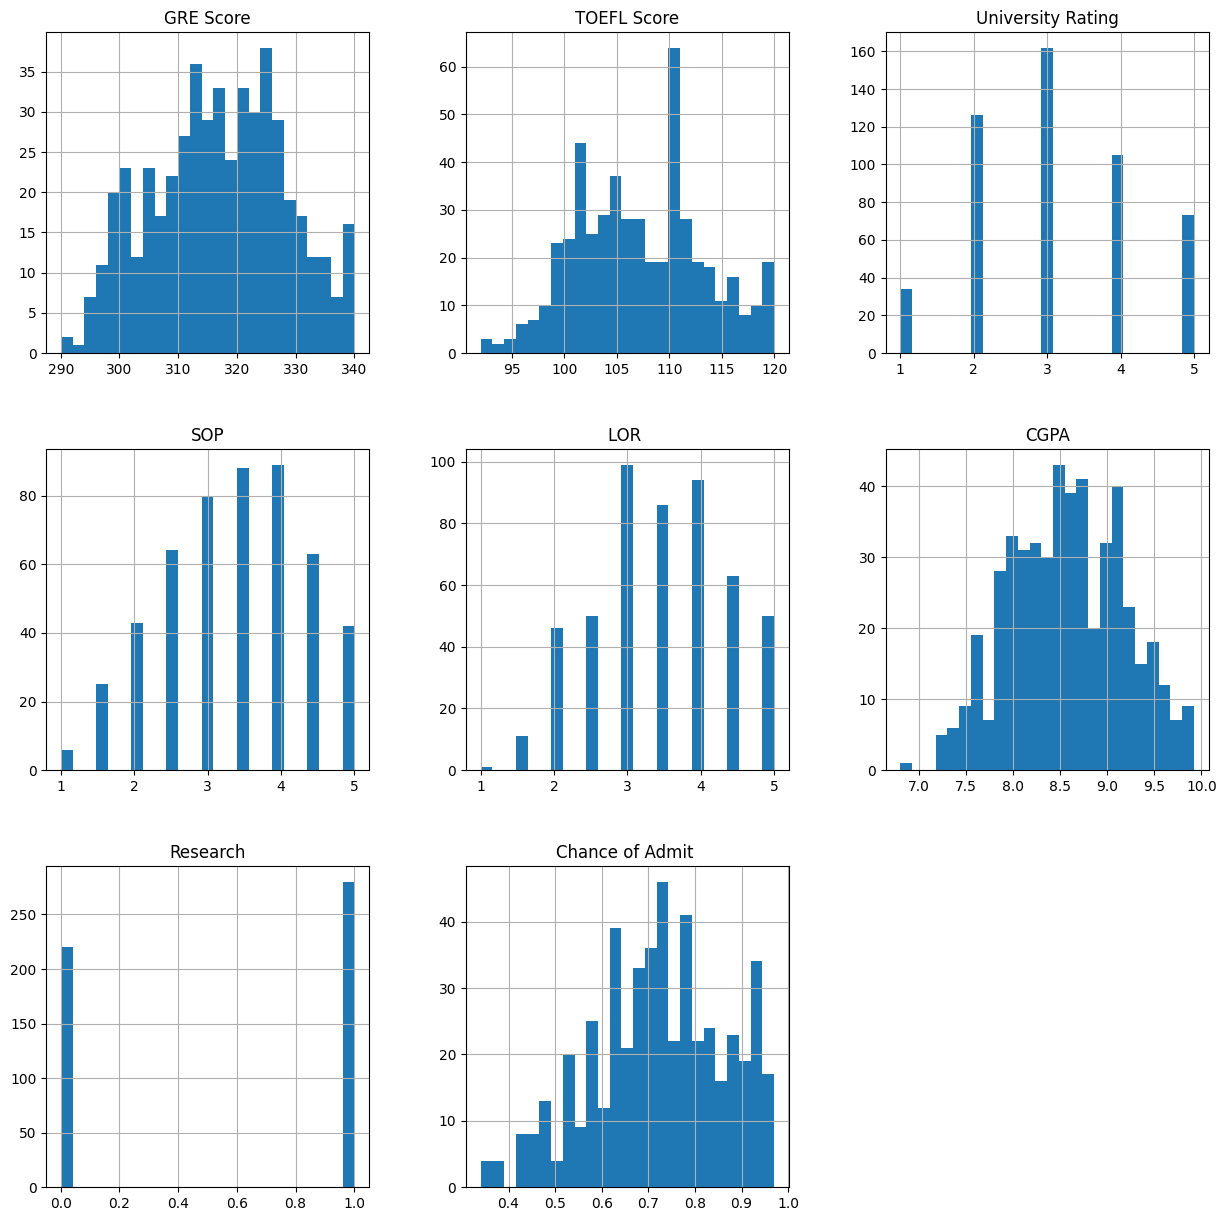

In [4]:
# Hitogramas de las varaibles del dataset
data.hist(bins=25, figsize=(15,15))
plt.show()

In [5]:
# Definición de variables predictoras (X)
X = data.drop(data.columns[-1], axis=1)
# Definición de variable de interés (y)
Y = data[data.columns[-1]]

In [6]:
# Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test usandola función train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X,Y,test_size=0.3, random_state=22)

## Punto 1 - Red Neuronal de una capa

En la celda 1 creen una **red neuronal de una capa** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes, usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador y el número de épocas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

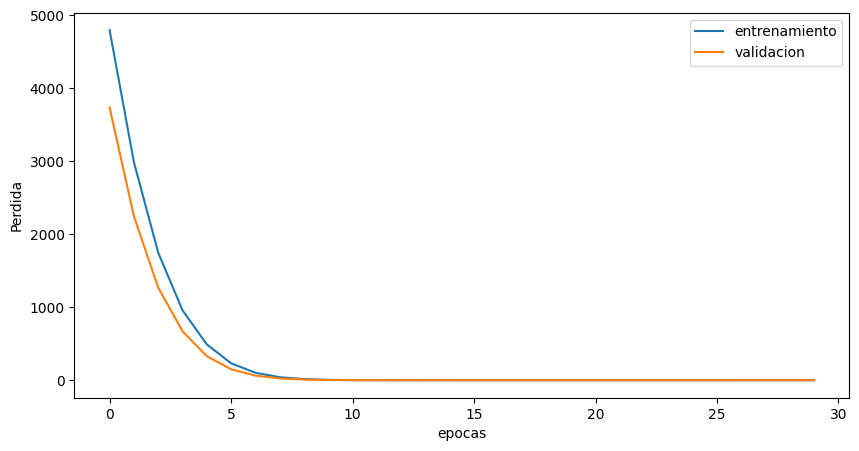

Error absoluto medio (MAE): 0.5119
Error cuadratico medio(MSE): 0.3736


In [7]:
# Celda 1

modelo = Sequential()
modelo.add(Dense(1, input_dim=X.shape[1], activation='linear'))

modelo.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error', 'mean_squared_error'])
history = modelo.fit(xTrain, yTrain, epochs=30, batch_size=10, validation_data=(xTest, yTest), verbose=0)

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='entrenamiento')
plt.plot(history.history['val_loss'], label='validacion')
plt.xlabel('epocas')
plt.ylabel('Perdida')
plt.legend()
plt.show()

loss, mae, mse = modelo.evaluate(xTest, yTest, verbose=0)
print("Error absoluto medio (MAE): {:.4f}".format(mae))
print("Error cuadratico medio(MSE): {:.4f}".format(mse))


## Punto 2 - Red Neuronal multicapa

En la celda 2 creen una **red neuronal con dos capas** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [8]:
# Celda 2
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import cross_val_score

def crear(layers):
    model = Sequential()
    model.add(Dense(32, input_dim=X.shape[1], activation='relu'))
    for i in range(layers):
        model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

X_np = xTrain.values
Y_np = yTrain.values

capas = range(1, 5)
resultados = []
for capa in capas:
    model = KerasRegressor(model=crear, model__layers=capa, epochs=30, batch_size=10, verbose=0)
    scores = cross_val_score(model, X_np, Y_np, cv=5, scoring='neg_mean_squared_error')
    print(f'MSE para {capa} capas ocultas: {-scores.mean():.4f}')
    resultados.append((capa, -scores.mean()))


MSE para 1 capas ocultas: 0.4317
MSE para 2 capas ocultas: 0.0431
MSE para 3 capas ocultas: 0.0132
MSE para 4 capas ocultas: 0.0161


In [21]:
def crear2(neurons):
    model = Sequential([
        Dense(neurons[0], input_dim=xTrain.shape[1], activation='relu'),
        Dense(neurons[1], activation='relu'),
        Dense(neurons[2], activation='relu'),
        Dense(1, activation='linear')
    ])
    model.compile(optimizer=Adam(), loss='mean_squared_error')
    return model

neuronas = [(16, 8, 8), (32, 16, 16), (64, 32, 32), (128, 64, 64), (256, 128, 128)]
for neurons in neuronas:
    estimator = KerasRegressor(build_fn=lambda: crear2(neurons), epochs=30, batch_size=10, verbose=0)
    scores = cross_val_score(estimator, xTrain, yTrain, cv=5, scoring='neg_mean_squared_error')
    print(f'MSE promedio con {neurons} neuronas: {-scores.mean():.4f}')



MSE promedio con (16, 8, 8) neuronas: 0.3444
MSE promedio con (32, 16, 16) neuronas: 0.0746
MSE promedio con (64, 32, 32) neuronas: 0.0278
MSE promedio con (128, 64, 64) neuronas: 0.0184
MSE promedio con (256, 128, 128) neuronas: 0.0189


Epoch 1/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 38.5945 - mean_absolute_error: 4.7792 - mean_squared_error: 38.5945 - val_loss: 1.1574 - val_mean_absolute_error: 1.0531 - val_mean_squared_error: 1.1574
Epoch 2/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5507 - mean_absolute_error: 0.6344 - mean_squared_error: 0.5507 - val_loss: 0.0338 - val_mean_absolute_error: 0.1470 - val_mean_squared_error: 0.0338
Epoch 3/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0531 - mean_absolute_error: 0.1824 - mean_squared_error: 0.0531 - val_loss: 0.0323 - val_mean_absolute_error: 0.1451 - val_mean_squared_error: 0.0323
Epoch 4/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0310 - mean_absolute_error: 0.1432 - mean_squared_error: 0.0310 - val_loss: 0.0349 - val_mean_absolute_error: 0.1561 - val_mean_squared_error: 0.0349
Epoch 5/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0294 - mean_absolute_error: 0.1413 - mean_squared_error: 0.0294 - val_loss: 0.0344 - val_mean_abso

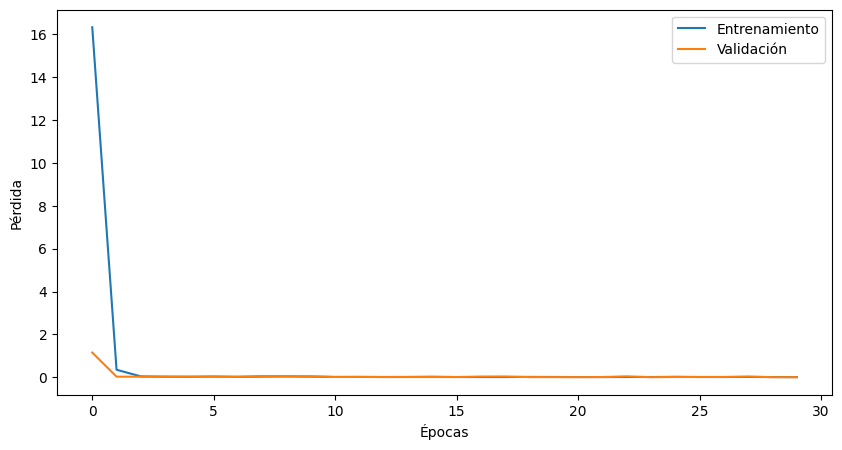

Error Absoluto Medio (MAE): 0.0706
Error Cuadrático Medio (MSE): 0.0082


In [25]:
modelo2 = Sequential([
    Dense(128, input_dim=xTrain.shape[1], activation='relu'),  
    Dense(64, activation='relu'),                
    Dense(64, activation='relu'),                  
    Dense(1, activation='linear')                            
])

modelo2.compile(optimizer=Adam(), loss='mean_squared_error', metrics=['mean_absolute_error', 'mean_squared_error'])
historial = modelo2.fit(xTrain, yTrain, epochs=30, batch_size=10, validation_data=(xTest, yTest), verbose=1)

plt.figure(figsize=(10, 5))
plt.plot(historial.history['loss'], label='Entrenamiento')
plt.plot(historial.history['val_loss'], label='Validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

loss, mae, mse = modelo2.evaluate(xTest, yTest, verbose=0)
print(f"Error Absoluto Medio (MAE): {mae:.4f}")
print(f"Error Cuadrático Medio (MSE): {mse:.4f}")

## Punto 3  - Red Neuronal multicapa

En la celda 3 creen **una red neuronal con más de una capa con la librería Keras, usando early stopping y dropout,** que prediga la probabilidad de admisión de los estudiantes con los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [11]:
# Celda 3


## Punto 4 - Comparación y análisis de resultados

En la celda 4 comparen los resultados obtenidos de las diferentes redes y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

In [12]:
# Celda 4
